Lista 5 de Álgebra Linear  (parte computacional)

#### Questão 1)

 Use a projeção ortogonal para encontrar o plano z = ax + by + c que melhor se ajusta aos pontos P1 = (0, 0, 0) ,
P2 = (1, 0, 3) , P3 = (0, 1, 2),P4 = (1, 1, 4) e P5 = (3, 2, 6) , no sentido dos mínimos quadrados.

Precisamos encontrar:  $(A^{T}A)^{-1}A^{T}Y$

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
A = [[0,0,1],[1,0,1],[0,1,1],[1,1,1],[3,2,1]]
A = np.asmatrix(A)
A

matrix([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
        [3, 2, 1]])

In [99]:
Y = [0,3,2,4,6]

In [100]:
B = np.linalg.inv(A.transpose()*A)*A.transpose()
B

matrix([[-0.05128205,  0.30769231, -0.43589744, -0.07692308,  0.25641026],
        [-0.23076923, -0.61538462,  0.53846154,  0.15384615,  0.15384615],
        [ 0.43589744,  0.38461538,  0.20512821,  0.15384615, -0.17948718]])

In [101]:
np.dot(B,Y) # a,b,c

matrix([[ 1.28205128,  0.76923077,  1.1025641 ]])

#### Questão 2)

Dois robôs vão negociar um ativo. A cada rodada o robô vendedor estabelece o preço x do ativo e simultaneamente o robô comprador faz a oferta de compra do ativo pelo valor y . O negócio só se concretiza quando
x ≤ y , com o valor negociado sendo (x + y)/2 . Suponha que os valores na primeira rodada sejam $x_{0}$ e $y_{0}$ ,
com $x_{0}$ > $y_{0}$ . Os robôs são programados para refazerem suas ofertas do seguinte modo: a cada período de
negociação k + 1 o novo valor estabelecido por cada robô é:

$x_{k+1}$ = $x_{k}$ − ($x_{k}$ − $y_{k}$)/3

$y_{k+1}$ = $y_{k}$ + ($x_{k}$ − $y_{k}$)/4

Use seus conhecimentos de autovalores e autovetores para decidir se haverá negociação e, em caso afirmativo,
qual será o valor negociado.

In [102]:
# venda = x e compra = y
# x<=y o negócio se concretiza

In [103]:
x=4
y=3

In [104]:
(x+y)/2

3.5

In [105]:
resultados=[]
for i in range(20):
    Xk_=x-(x-y)/3
    Yk_=y+(x-y)/4
    resultados.append((Xk_,Yk_))
    x=Xk_
    y=Yk_

In [106]:
resultados

[(3.6666666666666665, 3.25),
 (3.5277777777777777, 3.3541666666666665),
 (3.4699074074074074, 3.397569444444444),
 (3.4457947530864197, 3.415653935185185),
 (3.435747813786008, 3.4231891396604937),
 (3.431561589077503, 3.4263288081918724),
 (3.429817328782293, 3.42763700341328),
 (3.4290905536592886, 3.4281820847555333),
 (3.4287877306913703, 3.4284092019814723),
 (3.4286615544547376, 3.428503834158947),
 (3.4286089810228075, 3.4285432642328946),
 (3.42858707542617, 3.4285596934303726),
 (3.4285779480942375, 3.428566538929322),
 (3.4285741450392657, 3.428569391220551),
 (3.4285725604330275, 3.4285705796752297),
 (3.4285719001804282, 3.428571074864679),
 (3.4285716250751785, 3.4285712811936166),
 (3.4285715104479912, 3.428571367164007),
 (3.428571462686663, 3.428571402985003),
 (3.42857144278611, 3.428571417910418)]

In [107]:
resultados_dif = []
for i in resultados:
    j = i[1] - i[0]
    resultados_dif.append(j)

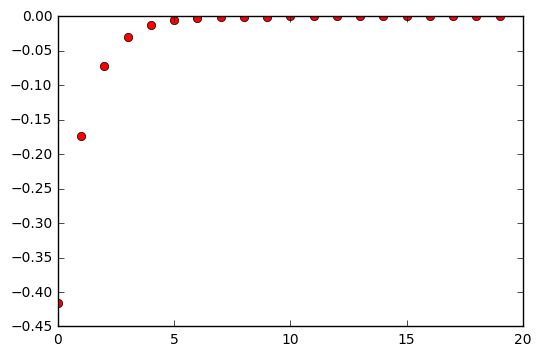

In [108]:
plt.plot(list(range(len(resultados_dif))),resultados_dif,'ro')
plt.show()

O valor negociado nunca será x (preço de venda) menor ou igual a y (preço de compra), porem podemos considerar que quando a diferença for muito pequena o negócio irá ocorrer. 

#### Fazer com equação diferente da anterior

$x_{k+1}$ = $x_{k}$ − ($x_{k}$ − $y_{k}$)/3

$y_{k+1}$ = $y_{k}$ + ($x_{k}$ − $y_{k}$)/2

In [109]:
m=[[2/3,1/3],[1/2,1/2]]
m = np.asmatrix(m)
m

matrix([[ 0.66666667,  0.33333333],
        [ 0.5       ,  0.5       ]])

Se os valores iniciais forem (12,6) quais serão os valores no segundo período?

In [110]:
v = [12,6]

In [111]:
novo_v = np.dot(m,v)
novo_v

matrix([[ 10.,   9.]])

In [112]:
m*novo_v.T

matrix([[ 9.66666667],
        [ 9.5       ]])

#### Fazer diagonalizada para saber as probabilidades no futuro 

In [113]:
m=[[2/3,1/3],[1/2,1/2]]
m = np.asmatrix(m)
m

matrix([[ 0.66666667,  0.33333333],
        [ 0.5       ,  0.5       ]])

In [114]:
autovalores,autovetores = np.linalg.eig(m)

In [115]:
D = np.diag(autovalores)
D

array([[ 1.        ,  0.        ],
       [ 0.        ,  0.16666667]])

In [116]:
autovetores * D * np.linalg.inv(autovetores) # igual a matriz inicial 

matrix([[ 0.66666667,  0.33333333],
        [ 0.5       ,  0.5       ]])

In [117]:
autovetores * (D**20) * np.linalg.inv(autovetores)

matrix([[ 0.6,  0.4],
        [ 0.6,  0.4]])

#### Questão 3)

#### a)

In [118]:
M = [[0.5,0.3,0.1],[0.3,0.4,0.3],[0.2,0.3,0.6]]
M = np.asmatrix(M)
M

matrix([[ 0.5,  0.3,  0.1],
        [ 0.3,  0.4,  0.3],
        [ 0.2,  0.3,  0.6]])

In [119]:
autovalor , autovetor = np.linalg.eig(M)

In [120]:
autovalor

array([ 1. ,  0.4,  0.1])

#### b)

In [121]:
x_0 = [0,0,1]

In [122]:
x_1 = np.dot(M,x_0)
x_2 = np.dot(M,x_1.transpose())
x_3 = np.dot(M,x_2)
x_3

matrix([[ 0.246],
        [ 0.333],
        [ 0.421]])

#### c) 

#### As probabilidades no futuro não dependem do valor inicial 

In [123]:
V = [0,1,0]

In [124]:
V1=np.dot(M,V)
V1

matrix([[ 0.3,  0.4,  0.3]])

In [125]:
V2=np.dot(M,V1.T)
V3=np.dot(M,V2)
V4=np.dot(M,V3)
V5=np.dot(M,V4)
V6=np.dot(M,V5)
V6

matrix([[ 0.27846 ],
        [ 0.333334],
        [ 0.388206]])

#### Exemplo para diagonalizar (VDV-1)

In [126]:
m

matrix([[ 0.66666667,  0.33333333],
        [ 0.5       ,  0.5       ]])

In [127]:
autovalores,autovetores = np.linalg.eig(m)

In [128]:
autovetores * np.diag(autovalores) * np.linalg.inv(autovetores)

matrix([[ 0.66666667,  0.33333333],
        [ 0.5       ,  0.5       ]])

In [129]:
autovetores * np.diag(autovalores)**10 * np.linalg.inv(autovetores)

matrix([[ 0.60000001,  0.39999999],
        [ 0.59999999,  0.40000001]])

#### Questão 4)

In [130]:
A = [[2,0,2/3,0,2/5,0],[0,2/3,0,2/5,0,2/7],[2/3,0,2/5,0,2/7,0],[0,2/5,0,2/7,0,2/9],[2/5,0,2/7,0,2/9,0],[0,2/7,0,2/9,0,2/11]]
A = np.asmatrix(A)
np.around(A,decimals=2)

array([[ 2.  ,  0.  ,  0.67,  0.  ,  0.4 ,  0.  ],
       [ 0.  ,  0.67,  0.  ,  0.4 ,  0.  ,  0.29],
       [ 0.67,  0.  ,  0.4 ,  0.  ,  0.29,  0.  ],
       [ 0.  ,  0.4 ,  0.  ,  0.29,  0.  ,  0.22],
       [ 0.4 ,  0.  ,  0.29,  0.  ,  0.22,  0.  ],
       [ 0.  ,  0.29,  0.  ,  0.22,  0.  ,  0.18]])

In [131]:
autovalores,autovetores = np.linalg.eig(A)

In [132]:
V = np.around(autovetores,decimals=2)
V

array([[ 0.91,  0.4 ,  0.07,  0.  ,  0.  , -0.  ],
       [-0.  ,  0.  , -0.  ,  0.78,  0.61,  0.17],
       [ 0.34, -0.66, -0.66, -0.  , -0.  ,  0.  ],
       [-0.  , -0.  ,  0.  ,  0.51, -0.44, -0.74],
       [ 0.22, -0.63,  0.74, -0.  ,  0.  , -0.  ],
       [-0.  , -0.  ,  0.  ,  0.38, -0.66,  0.65]])

In [133]:
np.around(autovalores,decimals=2)

array([ 2.35,  0.27,  0.01,  1.07,  0.07,  0.  ])

In [134]:
D = np.diag(np.around(autovalores,decimals=2))
D

array([[ 2.35,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.27,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.07,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.07,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [135]:
np.around(1/np.sqrt(autovalores),decimals=2)

array([  0.65,   1.93,  12.35,   0.97,   3.87,  28.23])

In [136]:
D = np.diag(np.around(1/np.sqrt(autovalores),decimals=2))
D

array([[  0.65,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   1.93,   0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,  12.35,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.97,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   3.87,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  28.23]])

In [137]:
# m = (autovetores de m*m.T) * (raiz dos autovalores de m.T*m) * (autovetores de m.T*m)